In [1]:
from tensorflow.keras import layers, models
import numpy as np
import tensorflow as tf
import keras

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 채널 추가하기
x_train = x_train.astype("float32") / 255.0

x_test  = x_test.astype("float32") / 255.0



X_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)

X_test  = x_test[..., tf.newaxis]   # (10000, 28, 28, 1)

In [4]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
y_train.shape

(60000,)

In [6]:
# CNN 모델 구성
#
model = models.Sequential([
    # 3x3 크기로 32개의 서로 다른 특징을 찾는다.  -> 단순
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #  찾아낸 특징을 2x2 구역으로 나누고 그 안에서 가장 큰 특징만 골라낸다.
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    #  찾아낸 특징을 2x2 구역으로 나누고 그 안에서 가장 큰 특징만 골라낸다.
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    # 원-핫 인코딩 하지 않아도 레이블이 정수 형태일 경우, sparse_categorical_crossentropy를 사용할 수 있다
    # categorical_crossentropy를 사용한다면 y 레이블을 모두 인코딩 해야 하므로
    # 한 줄만 수정해도 되는 sparse_categorical_entropy를 사용했다.
    # 내부적으로 레이블 간 상관관계를 알아서 다 끊어줌
    metrics=["accuracy"]
)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1
)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8942 - loss: 0.3336 - val_accuracy: 0.9785 - val_loss: 0.0673
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9795 - loss: 0.0641 - val_accuracy: 0.9881 - val_loss: 0.0413
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.9893 - val_loss: 0.0367
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9883 - loss: 0.0360 - val_accuracy: 0.9898 - val_loss: 0.0372
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9913 - loss: 0.0254 - val_accuracy: 0.9916 - val_loss: 0.0336
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.9903 - val_loss: 0.0403
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9912 - val_loss: 0.0326
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0

In [9]:
y_pred = model.predict(X_test)

y_test_class = y_test
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


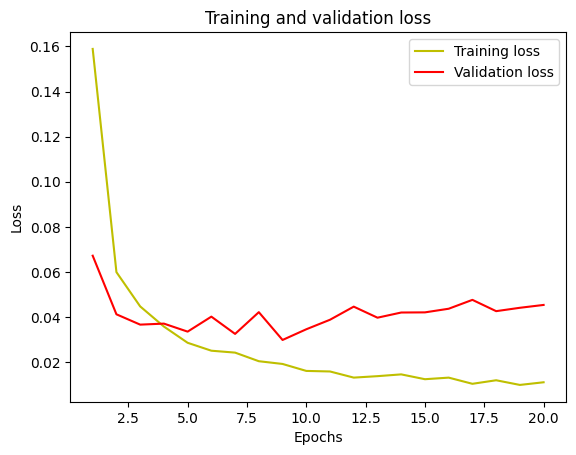

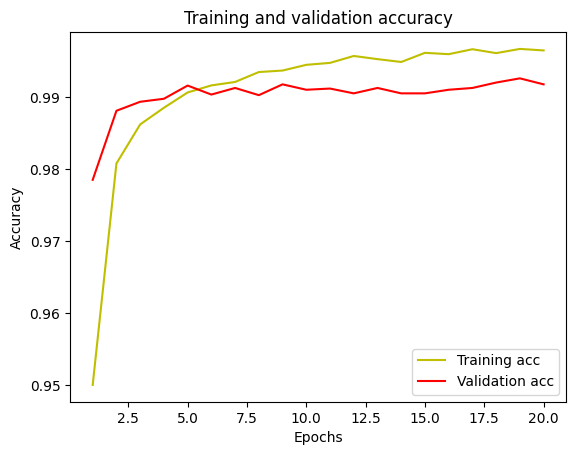

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1131    0    2    0    1    0    1    0    0]
 [   1    0 1023    1    1    0    0    6    0    0]
 [   0    0    1 1007    0    1    0    1    0    0]
 [   0    0    0    0  974   

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.9916 - loss: 0.0425

✅ Test Accuracy: 0.9916
